In [1]:
from astropy.io import fits
from astropy.nddata import NDData, CCDData, Cutout2D
import numpy as np
import matplotlib.pyplot as plt
from astropy.wcs import WCS
from os import path

acv_cat = fits.open('field_cat.fits')
data_cat = acv_cat[1].data

In [ ]:
data_cat[59]

(59, 34.026699, -5.0602002, 1.411, 7.9400001, 0.0, 0.0, 'nan', 'nan', 'IDNL18010', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan')

In [2]:
image = fits.open('dataset_all/IDNL18010/idnl18010_drz.fits')

In [10]:
# Set the WCS information manually by setting properties of the WCS
# object.

import numpy as np
from astropy import wcs
from astropy.io import fits

# Create a new WCS object.  The number of axes must be set
# from the start
w = wcs.WCS(naxis=2)

# Set up an "Airy's zenithal" projection
# Vector properties may be set with Python lists, or Numpy arrays
w.wcs.crpix = [-234.75, 8.3393]
w.wcs.cdelt = np.array([-0.066667, 0.066667])
w.wcs.crval = [0, -90]
w.wcs.ctype = ["RA---AIR", "DEC--AIR"]
w.wcs.set_pv([(2, 1, 45.0)])

In [11]:
# Three pixel coordinates of interest.
# The pixel coordinates are pairs of [X, Y].
# The "origin" argument indicates whether the input coordinates
# are 0-based (as in Numpy arrays) or
# 1-based (as in the FITS convention, for example coordinates
# coming from DS9).
pixcrd = np.array([[0, 0], [24, 38], [45, 98]], dtype=np.float64)

# Convert pixel coordinates to world coordinates.
# The second argument is "origin" -- in this case we're declaring we
# have 0-based (Numpy-like) coordinates.
world = w.wcs_pix2world(pixcrd, 0)
print(world)

# Convert the same coordinates back to pixel coordinates.
pixcrd2 = w.wcs_world2pix(world, 0)
print(pixcrd2)

# These should be the same as the original pixel coordinates, modulo
# some floating-point error.
assert np.max(np.abs(pixcrd - pixcrd2)) < 1e-6

[[268.21686048 -73.66991904]
 [276.73200097 -71.89766949]
 [287.89647405 -69.59151783]]
[[ 1.02318154e-12 -1.65201186e-13]
 [ 2.40000000e+01  3.80000000e+01]
 [ 4.50000000e+01  9.80000000e+01]]


In [12]:
# The example below illustrates the use of "origin" to convert between
# 0- and 1- based coordinates when executing the forward and backward
# WCS transform.
x = 0
y = 0
origin = 0
assert (w.wcs_pix2world(x, y, origin) ==
        w.wcs_pix2world(x + 1, y + 1, origin + 1))

# Now, write out the WCS object as a FITS header
header = w.to_header()

# header is an astropy.io.fits.Header object.  We can use it to create a new
# PrimaryHDU and write it to a file.
hdu = fits.PrimaryHDU(header=header)
# Save to FITS file
# hdu.writeto('test.fits')

In [13]:
from astropy.utils.data import get_pkg_data_filename
fn = get_pkg_data_filename

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---AIR'  'DEC--AIR'  
CRVAL : 0.0  -90.0  
CRPIX : -234.75  8.3393  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.066667  0.066667  
NAXIS : 0  0

In [18]:
w = WCS(image[1].header)

In [40]:
world = SkyCoord(data_cat[59][1], data_cat[59][2], unit='deg')

In [42]:
position = w.world_to_pixel(world)

In [45]:
ccd = CCDData(image[1].data, unit='adu')
cutout = Cutout2D(ccd, position, size=50)

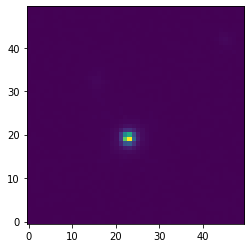

In [46]:
plt.imshow(cutout.data, origin='lower')

In [47]:
cutout1 = Cutout2D(ccd, world, wcs=w, size=50)

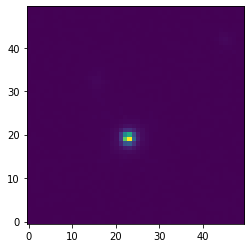

In [48]:
plt.imshow(cutout1.data, origin='lower')

In [36]:
world = w.pixel_to_world(50, 50)

In [38]:
type(world)

astropy.coordinates.sky_coordinate.SkyCoord

In [35]:
from astropy.coordinates import SkyCoord
pix = w.world_to_pixel(world)

ValueError: Expected the following order of world arguments: SkyCoord

In [8]:
image[1].data.shape

(1093, 1235)

In [9]:
header['RA_TARG']

34.03445833333